In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data/parkinsons_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [24]:
df.isna().sum() # There are no null values

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

There are multiple categorical features in this dataset, all of which have been imputed with integers $0, 1, 2,\cdots$. Although there are those that are actually ordinal in nature, i.e. there is an assumed order, most are not. Importantly, they also make EDA somewhat difficult. Hence, only for the EDA portion of the analysis, these features (at least the ones which are not simply yes/no) will be converted into string columns with the appropriate labels. Another important reason for doing this is that ordinal encoding will give erroneous results when training a machine learning model.

**Legend:**
1. Gender - 0 (Male), 1 (Female) 
2. Ethnicity - 0 (Caucasian), 1 (African American), 2 (Asian), 3 (Other) (quite a restrictive set)
3. Educational level - 0 (None), 1 (High School), 2 (Bachelor's), 3 (Higher) (there is ordinality in this encoding)
4. Smoking - 0 (No), 1 (Yes)
5. Family history of Parkinson's - 0 (No), 1 (Yes)
6. Traumatic brain injury - 0 (No), 1 (Yes)
7. Hypertension - 0 (No), 1 (Yes)
8. Diabetes - 0 (No), 1 (Yes)
9. Depression - 0 (No), 1 (Yes)
10. History of stroke - 0 (No), 1 (Yes)
11. Tremors - 0 (No), 1 (Yes)
12. Rigidity - 0 (No), 1 (Yes)
13. Bradykinesia - 0 (No), 1 (Yes)
14. Postural instability - 0 (No), 1 (Yes)
15. Speech problems - 0 (No), 1 (Yes)
16. Sleep disorders - 0 (No), 1 (Yes)
17. Constipation - 0 (No), 1 (Yes)

All but two of these features are binary. Hence, the encoding is fine. 

In [66]:
def ethnicityDecode(x):
    if x == 0:
        return 'Caucasian'
    elif x == 1:
        return 'African American'
    elif x == 2:
        return 'Asian'
    else:
        return 'Other'

def educationDecode(x):
    if x == 0:
        return 'None'
    elif x == 1:
        return 'High school'
    else:
        return 'Higher'

''' 
Applying transformations to 'Ethnicity' and 'EducationLevel' columns for
decoding.
'''
df['Ethnicity'] = df['Ethnicity'].apply(lambda x: ethnicityDecode(x))
df['EducationLevel'] = df['EducationLevel'].apply(lambda x: educationDecode(x))

In [150]:
df.select_dtypes('float').describe().apply("{0:.5f}".format)

TypeError: unsupported format string passed to Series.__format__

The dataset is over-represented by Caucasian patients. This should be taken under considering during training such that each category can get more-or-less equal representation. However, the male-to-female ratio is very even.

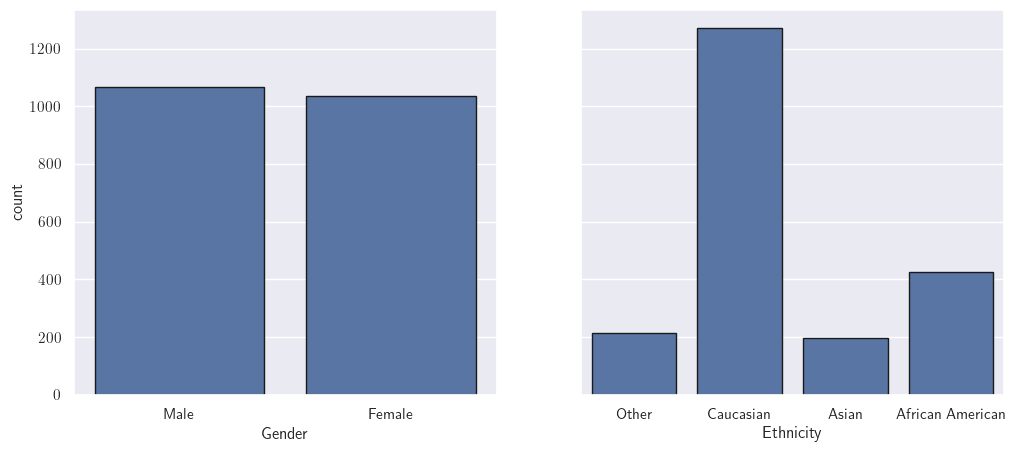

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(df, x='Gender', edgecolor='k', ax=ax1)
ax1.set_xticklabels(['Male', 'Female'])
sns.countplot(df, x='Ethnicity', edgecolor='k', ax=ax2)
plt.show()

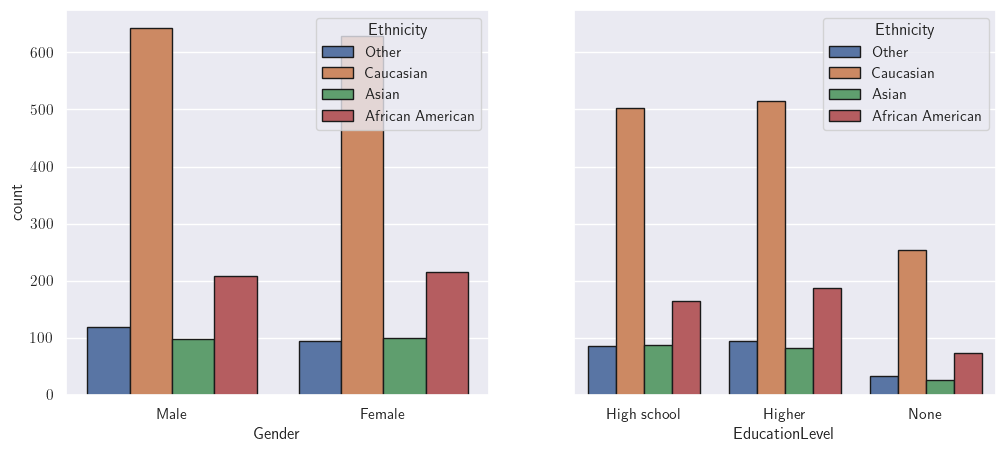

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(df, x='Gender', hue='Ethnicity', ax=ax1, edgecolor='k')
ax1.set_xticklabels(['Male', 'Female'])
sns.countplot(df, x='EducationLevel', hue='Ethnicity', ax=ax2, edgecolor='k')
plt.show()

In [126]:
# Separating out the numerical columns for analysis

numeric_cols = [
    'Age',
    'BMI',
    'AlcoholConsumption',
    'PhysicalActivity',
    'DietQuality',
    'SleepQuality',
    'SystolicBP',
    'DiastolicBP',
    'CholesterolTotal',
    'CholesterolLDL',
    'CholesterolHDL',
    'CholesterolTriglycerides',
    'UPDRS',
    'MoCA'
]

df_numeric = df[numeric_cols]

It is quite interesting that these variables are really correlated. One should expect that some these metrics to be relatively highly correlated. 

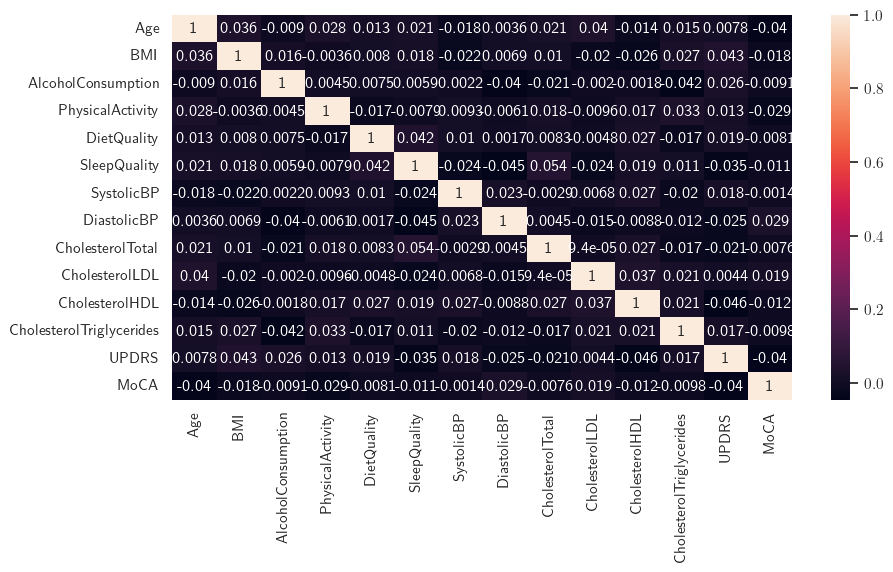

In [144]:
# Are there much correlation between these attributes?

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_numeric.corr(), annot=True, ax=ax)
plt.show()